## Problem 1
<p>In this problem we learn that the approach taken in linear regression can be used when there
are variables’ powers of more than one in the function formula which is called polynomial regression.
Consider the polynomial regression problem with four training data points {(0, 1),(2, 4),(3, 9),(5, 16)}
and two test data points {(1, 3),(4, 12)} in 2-D space. The d-degree polynomial regression problem
is to find a d-degree polynomial</p>
<p>ˆf(x) = α0 + α1x + α2x
2 + · · · + αd−1x
d−1 + x
d</p>
<p>that fit the data with optimal RSS (residual sum of squares).</p>

## Part 1
<p>Solve the d-degree polynomial regression problems with d = 0, 1, 2, 3, 4. Show the data points
and all your regressed curves in one plot. Make sure to represent the training points and test points
in different color or markers.
</p>

In [42]:
# Importing Packages
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from statistics import variance as var

In [43]:
# Train and Test data from question

train_data = np.matrix([[0,1],[2,4],[3,9],[5,16]])
test_data = np.matrix([[1,3],[4,12]])


train_x = train_data[:,0]
train_x = np.squeeze(np.asarray(train_x))
train_y = train_data[:,1]
train_y = np.squeeze(np.asarray(train_y))


x_test = test_data[:,0:1]
y_test = test_data[:,1]

In [54]:
# Functions to estimate co-efficients of the model
def estimate_coef_d0(x,y):

    b0 = np.mean(y)
    return b0

def estimate_coef_d1(x, y): 
    n = np.size(x) 
    m_x, m_y = np.mean(x), np.mean(y) 
    b_1 = 1
    b_0 = m_y - b_1*m_x 
    return(b_0, b_1)

def estimate_coef_d2(x,y):
    n = np.size(x)
    m_x, m_y = np.mean(x), np.mean(y)
    num = np.sum(x*x*x) + n*m_x*m_y -np.sum(x*y)-m_x*np.sum(x*x)
    den = n*m_x**2 - np.sum(x*x)
    b_1 = num/den
    b_0 = (n*(m_y-b_1*m_x)-np.sum(x*x))/n
    return (b_0,b_1,1)

def func4(x, alpha_0, alpha_1, alpha_2, alpha_3, alpha_4):
  return alpha_0 + alpha_1 * x + alpha_2 * x ** 2 + alpha_3 * x ** 3 + x ** 4

def func3(x, alpha_0, alpha_1, alpha_2, alpha_3):
  return alpha_0 + alpha_1 * x + alpha_2 * x ** 2 + pow(x,3)

In [55]:
def func(x,b,d): 
   
    if d==0:
      return b
    elif d==1:
      return b[0] + b[1]*x 
    elif d==2:
      return  b[0] + b[1]*x + b[2]*x**2 
    elif d==3:
      return b[0]+b[1]*x + b[2]*x**2 + b[3]*x**3
    elif d==4:
      return b[0]+b[1]*x + b[2]*x**2 + b[3]*x**3 + b[4]*x**4

In [56]:
# estimating coefficients
b0 = estimate_coef_d0(train_x, train_y)
b1 = estimate_coef_d1(train_x, train_y)
b2 = estimate_coef_d2(train_x, train_y)
b3,_ = curve_fit(func3, train_x, train_y, bounds=([-np.inf, -np.inf, -np.inf, 1], [np.inf, np.inf, np.inf, 1.0001]))
b4,_ = curve_fit(func4, train_x, train_y, bounds=([-np.inf, -np.inf, -np.inf, -np.inf, 1], [np.inf, np.inf, np.inf, 
                                                                                            np.inf, 1.0001]))

x = np.linspace(train_x[0], train_x[-1], 1000)


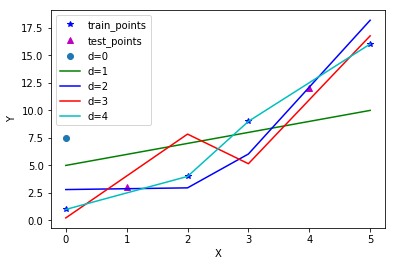

In [57]:
# Plots of curves obtained
plt.plot(train_x, train_y, 'bo', marker = '*' ,label="train_points")
plt.plot(x_test, y_test, 'mD', marker = '^' ,label="test_points")

plt.plot(0, func(train_x,b0,0), 'o', label="d=0")
plt.plot(train_x, func(train_x, b1,1), 'g-', label="d=1")
plt.plot(train_x, func(train_x, b2,2), 'b-', label="d=2")
plt.plot(train_x, func(train_x,b3,3), 'r-', label="d=3")
plt.plot(train_x, func(train_x, b4,4), 'c-', label="d=4")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [74]:
# Updating the Beta values
b = []
b.append(b0)
b.append(b1)
b.append(b2)
b.append(b3)
b.append(b4)


## Part 2
<p> For each d, calculate the typical (squared) bias, variance, total error, training error and test
error. Then, draw a plot of the above five curves as we go from simpler model to more complex
model. The x-axis should be the order d of the polynomials, from 1 to 4, and the y-axis should be
the values for each curve. Make sure to label each curve.
</p>

In [60]:
total_error_array = []
training_error_array = []
bias_array = []
variance_array = []
for d in range(0,5):
    train_rse_error = 0
    bias = 0
    y_pred_array = []
    for i in range(np.size(train_x)):
        y_pred = func(train_x[i],b[d],d)
        bias += pow((y_pred-train_y[i]),2)
        train_rse_error += (y_pred-train_y[i])**2
        y_pred_array.append(y_pred)
     
    variance_array.append(var(y_pred_array)) 
    rse = math.sqrt(train_rse_error)
    total_error_array.append(rse)
    bias_array.append(bias)
    training_error_array.append(rse)

In [61]:
test_error_array = []
for d in range(0,5):
    test_rse_error = 0
    
    for i in range(np.size(x_test)):    
        test_rse_error += pow((func(x_test[i],b[d],d)-y_test[i]),2)

    rse = math.sqrt(test_rse_error)
    total_error_array[d]+=rse
    test_error_array.append(rse)

In [62]:
d = range(0,5)
training_error = np.ravel(training_error_array)
test_error = np.ravel(test_error_array)
total_error = np.ravel(total_error_array)
variance = np.ravel(variance_array)
bias = np.ravel(bias_array)

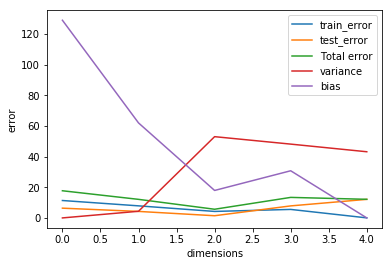

In [63]:
# Error Plots
plt.plot(d,training_error, label = 'train_error')
plt.plot(d,test_error, label = 'test_error')
plt.plot(d,total_error,label = 'Total error')
plt.plot(d,variance,label = 'variance')
plt.plot(d,bias,label = 'bias')
plt.ylabel('error')
plt.xlabel('dimensions')
plt.legend()
plt.show()

## Part 3
<p> Explain why each of the five curves has the shape displayed in part (2).
</p>

<p><b> Bias:</b> </p>
   <p> The bias depends on the degree of the model. Higher the flexibility of the model, i.e. higher the degree of freedom, lower will be the bias. Thus from the chart, it is evident that as we increase the value of d, the bias reduces</p>
  <p><b> variance:</b> </p>
   <p> Variance of a model will be lower for higher degrees of freedom. This is because the model will be able to better fit the data when the non linearity increases</p>
   <p><b> Training Error:</b> </p>
   <p> The training error reduces as the model flexibility increases as the model is able to better fit the data with higher values of d. From the graph, it is evident that the training error is reducing with our data</p>
   <p><b> Test Error:</b> </p>
   <p> Test error is a function of both the bias and variance. So initially, the bias term being a square term reduces the testing error and the bias becomes constant after a point. Then the variance term takes over that increases the error.</p>
   <p><b> Total Error:</b> </p>
   <p> Total error is a sum of the testing error along with the irreducible error. Thus the function is similar to the testing error along with the irreducible error</p>
   

## Part 4
<p>  In this part we want to implement linear regression. Consider the Smarket dataset used
in discussion week 1 available to download from here. In this assignment, we model Today based
on Lag1 and Lag2. We want to make a comparison between the RSS of the models trained using
L
1
-norm and L
2
-norm in a 5-fold cross validation scheme. For each of the norms, please perform a
5-fold cross validation where in each fold the model is trained with a specific norm but the output
of the trained model is assessed using L
2
-norm. Please compare the mean values across all the 5
folds together. Justify your results.

</p>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from scipy.optimize import minimize
from sklearn.model_selection import KFold

In [112]:
df = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df.shape

data = df[['Lag1','Lag2','Today']].values

In [113]:
def fit(X1,X2,params):
    # 2d Line Z = aX + b
    #print(type(X))
    return params[:1] + X1.dot(params[1:2])+ X2.dot(params[2:3])

def cost_function(params, X1, X2, y, p):
    error_vector = y - fit(X1, X2, params)
    return np.linalg.norm(error_vector, ord=p)

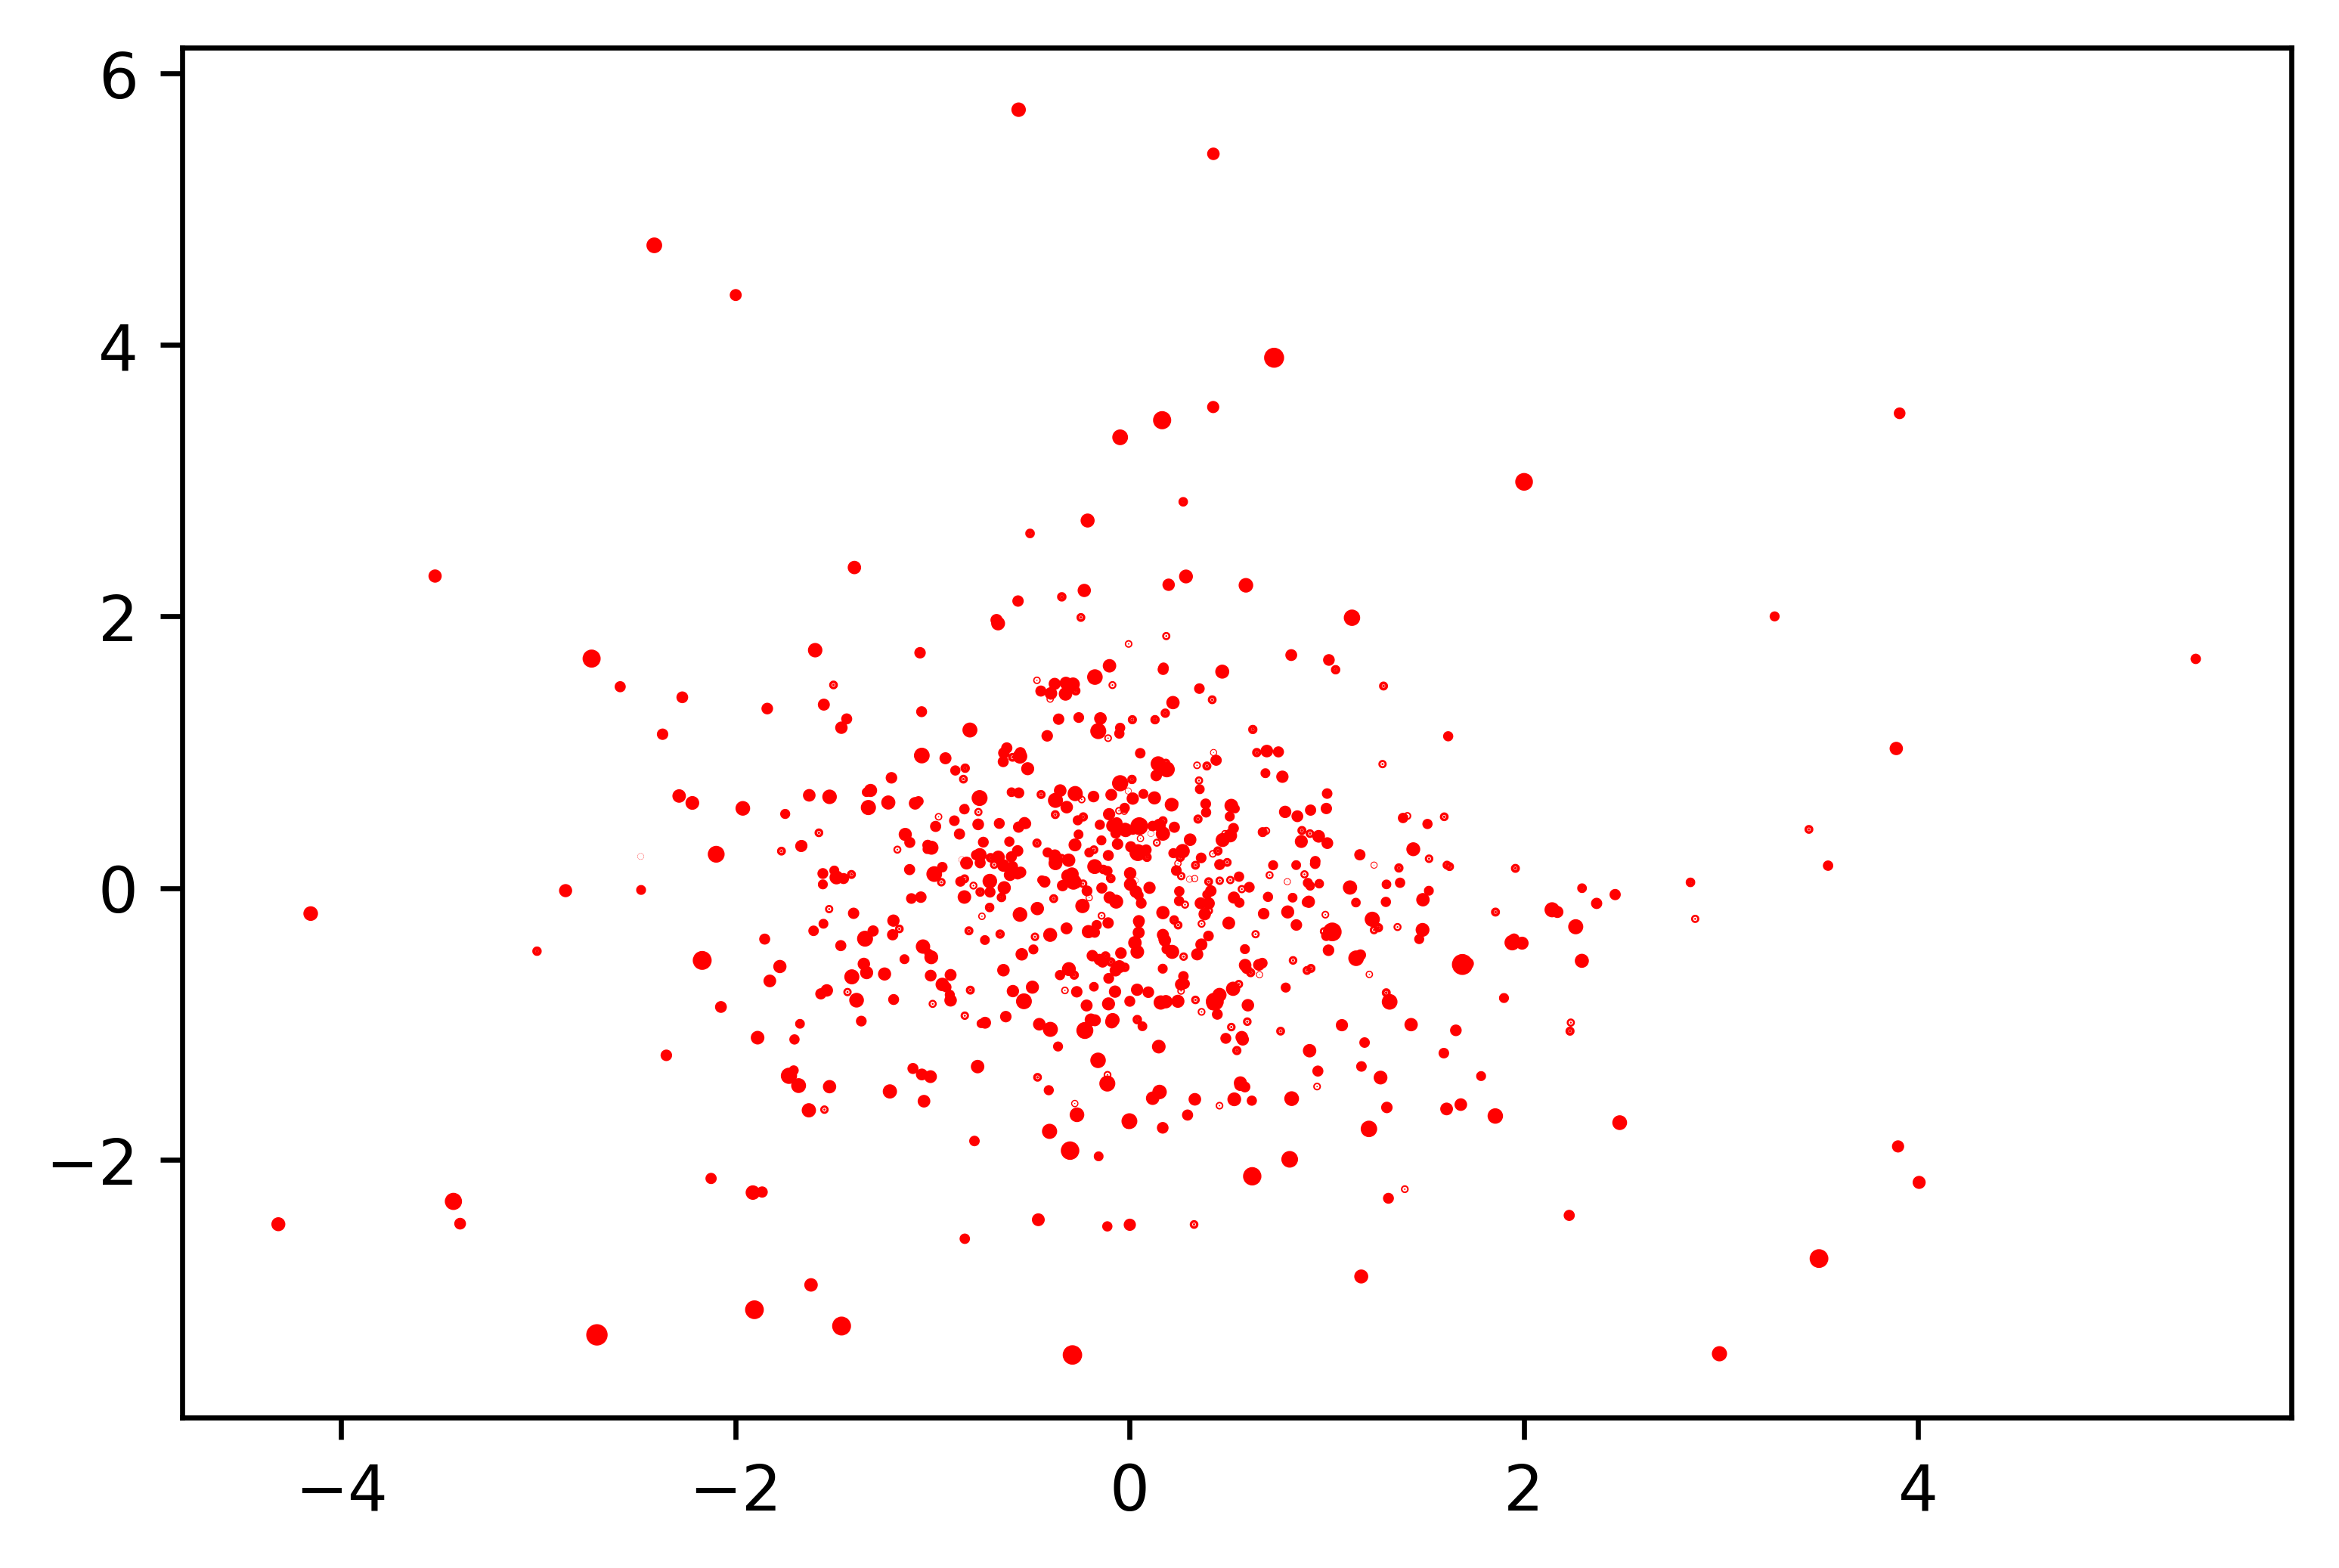

In [118]:
plt.figure(dpi=600)
plt.scatter(data[:,0], data[:, 1],data[:, 2],color = 'red')
plt.show()

In [72]:
kf = KFold(n_splits=5,shuffle=True)
L1_folds=[]
L1=[]
L2_folds=[]
L2=[]
for train_index, test_index in kf.split(data):
    Train, Test = data[train_index], data[test_index]
    for p in [1, 2]:
        output = minimize(cost_function, [0.5,0.5,0.5], args=(np.c_[Train[:,0]],np.c_[Train[:,1]], Train[:, 2], p))
        y_hat = fit(np.c_[Test[:,0]],np.c_[Test[:,1]], output.x)
        if p==1:
            L1_folds.append(np.sum(np.square(Test[:,2]-y_hat)))
            L1.append(output.x)
        else:
            L2_folds.append(np.sum(np.square(Test[:,2]-y_hat)))
            L2.append(output.x)


In [121]:
L_1=np.asarray(L1)
L1_out=[np.mean(L_1[:,0]),np.mean(L_1[:,1]),np.mean(L_1[:,2])]
L_2=np.asarray(L2)
L2_out=[np.mean(L_2[:,0]),np.mean(L_2[:,1]),np.mean(L_2[:,2])]
x_arg = [np.argmin(data[:,0]), np.argmax(data[:,0])]
for p in [1,2]:
    if p==1:
        y_hat = fit(np.c_[data[:,0]],np.c_[data[:,1]], L1_out)
    else:
        y_hat = fit(np.c_[data[:,0]],np.c_[data[:,1]], L2_out)
    
    x_min, x_max, y_min, y_max  = data[x_arg[0],0], data[x_arg[1],0], y_hat[x_arg[0]], y_hat[x_arg[1]]
    
print('RSS for  L1 norm',L1_folds)
print('RSS for L2 norm',L2_folds)
print(fit(np.c_[data[0:5,0]],np.c_[data[0:5,1]], L1_out))
print(fit(np.c_[data[0:5,0]],np.c_[data[0:5,1]], L2_out))


RSS for  L1 norm [395.22481498126217, 355.6481368774484, 274.83486285663776, 276.803282165341, 323.0038516299269]
RSS for L2 norm [393.8344142737267, 356.08822943689563, 270.0324712419247, 275.01652779035373, 324.72994577243844]
[ 0.02307528 -0.0405378  -0.07017809  0.0387393   0.02571917]
[-0.00488062 -0.02635374 -0.0344208   0.00891431 -0.00652578]


## Problem 2
<p>Consider the logistic regression
problem with two training points{(−3, 1),(−1, 0)} and two test data points with features {−4, 5}.
We want to train our logistic regression model of the form:</p>
<p>p(y|x, β) = Ber(y|µ(βT x))</p>
<p>Where here we have:</p>
<p>β = (1, β0)T</p>
<p>and</p>
<p>x = (x, 1)T</p>
<p>therefore, for each point we have:
βT x = x + β0</p>
<p>Note that we have assumed the slope to be 1.</p>

## Part 1
<p>  Please form the cross-entropy error similar to the slides and find the optimum β0. For finding
the optimum value, you can either use the derivative or you can plot the function using websites
such as fooplot.

</p>

<p><img src="Part 1.jpg" alt="Part 1" title="Part 1"></p>
<p><img src="foo_plot.jpg" alt="Part 1" title="Part 1"></p>

## Part 2
<p>  What would be the model output for test data points?


</p>

<p><img src="Part 2.jpg" alt="Part 2" title="Part 2"></p>

## Problem 3
<p>Models for Heart Disease. </p><p>For this problem,
please download the associated hw1 input.csv file. Heart disease is a major burden on the health
care system and a leading cause of death in older adults. It is important to predict, from clinical
data gathered on patients, who will have heart disease and who will not. In this problem, we will
explore a dataset of such clinical data.
</p>

## Part 1
<p> <b>Data Exploration:</b></p><p> Please inspect the input features and provide scatter plots and histograms for the data, and explain the dataset (including difference between categorical and continuous features).


</p>

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, f1_score,r2_score
import numpy as np
import sklearn.preprocessing as sk
from sklearn.model_selection import GridSearchCV
from scipy.optimize import curve_fit
import csv
import pandas as pd
from statistics import mean, median, variance
from sklearn import linear_model
from sklearn.linear_model import Ridge
import scipy.stats

import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from matplotlib.patches import Rectangle
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [127]:
# Importing Data from dataset
df = pd.read_csv("hw1_input.csv")
df.head()


,Age,Sex,Chest Pain,BP,Cholestoral,fasting blood sugar > 120,resting ECG,max hr,angina,oldpeak,slope,major vessels,defect,heart disease
0,70,Female,Abnormal,130,322,No,hyper,109,No,2.4,Flat,3,Normal,Yes
1,67,Male,Asymptomatic,115,564,No,hyper,160,No,1.6,Flat,0,reversible Defect,No
2,57,Female,Angina,124,261,No,norm,141,No,0.3,Up,0,reversible Defect,Yes
3,64,Female,Abnormal,128,263,No,norm,105,Yes,0.2,Flat,1,reversible Defect,No
4,74,Male,Angina,120,269,No,hyper,121,Yes,0.2,Up,1,Normal,No


In [128]:
df.describe()

,Age,BP,Cholestoral,max hr,oldpeak,major vessels
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000


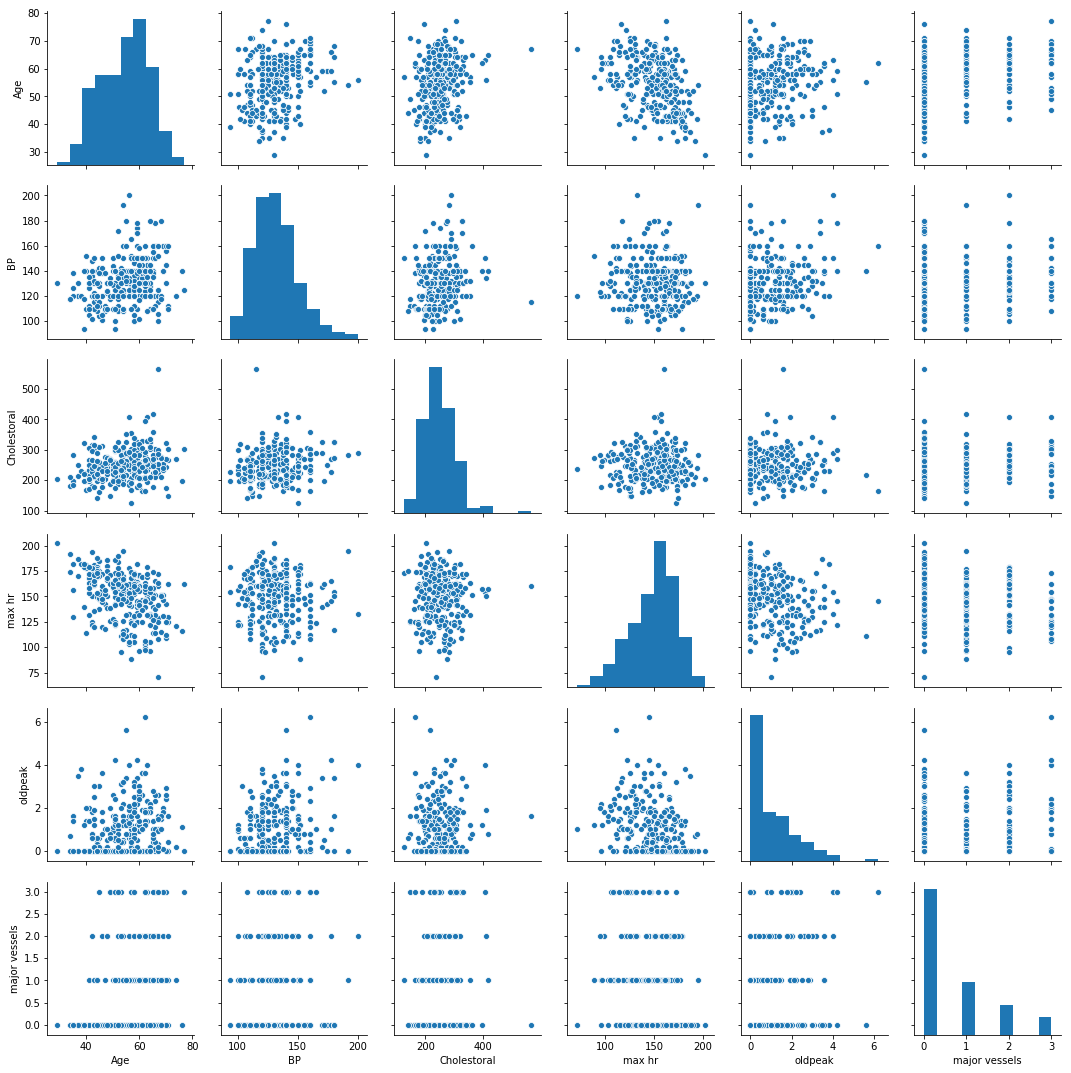

In [129]:
sns.pairplot(df)

In [133]:
# Data Modification
x = df[['Age','Sex','Chest Pain','BP','Cholestoral','fasting blood sugar > 120','resting ECG','max hr','angina','oldpeak','slope','major vessels','defect']]
y = df[['heart disease']]


df = pd.get_dummies(df, columns=["Sex","Chest Pain","fasting blood sugar > 120","resting ECG","angina","slope","defect","heart disease"])
df["heart disease"]=df["heart disease_Yes"]
df=df.drop(columns=['heart disease_Yes', 'heart disease_No'])

total_data = df
total_data.head()

,Age,BP,Cholestoral,max hr,oldpeak,major vessels,Sex_Female,Sex_Male,Chest Pain_Abnormal,Chest Pain_Angina,...,resting ECG_norm,angina_No,angina_Yes,slope_Down,slope_Flat,slope_Up,defect_Fixed Defect,defect_Normal,defect_reversible Defect,heart disease
0,70,130,322,109,2.4,3,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
1,67,115,564,160,1.6,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,57,124,261,141,0.3,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,1
3,64,128,263,105,0.2,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,74,120,269,121,0.2,1,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0


In [130]:
# Extracting inputs and labels from data
cols= total_data.shape[1]
X = total_data.iloc[:, : cols-1]

y = total_data.iloc[:, cols-1:cols ]

def roc_curve_plot(fpr,tpr,auroc):
    plt.figure()
    plt.title('Receiver Operating Characteristics')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auroc)
    plt.legend(loc = 'best')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [93]:
F1_score_ridge = []
F1_score_lasso = []


In [94]:
# split data into 80/20 for training and testing

X_tr, X_tst, Y_tr, Y_tst =  train_test_split(X, y, test_size=0.20, random_state=42)
max_iter = 10^8

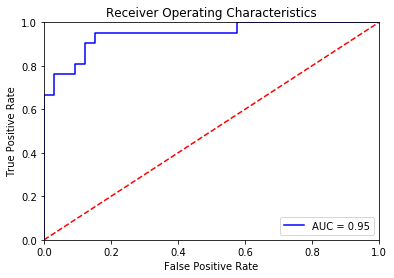

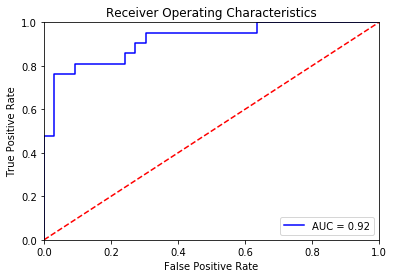

Optimum Threshold for ridge regression 0.3721231613398746
Optimum Threshold for lasso regression 0.4569496746919069


In [95]:
# Single Bootstrap Data
# lasso regression
ridge_regressor = Ridge(max_iter = max_iter)
ridge_regressor = GridSearchCV(estimator=ridge_regressor, param_grid={'alpha':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}, cv= 5)
ridge_regressor.fit(X_tr, Y_tr)
 

ridge_model = Ridge(alpha=ridge_regressor.best_params_['alpha'])
ridge_model.fit(X_tr,Y_tr)


# lasso regression
lasso_regressor = Lasso(max_iter = max_iter)
lasso_regressor = GridSearchCV(estimator=lasso_regressor, param_grid={'alpha':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}, cv= 5)
lasso_regressor.fit(X_tr, Y_tr)

# Predicred values
ridge_pred = ridge_regressor.predict(X_tst)
lasso_pred = lasso_regressor.predict(X_tst)

# AUROC for Ridge and Lasso Regression
fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(np.array(Y_tst), ridge_pred)
auroc_rr = auc(fpr_ridge,tpr_ridge)

fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(np.array(Y_tst), lasso_pred)
auroc_lr = auc(fpr_lasso,tpr_lasso)

# Optimum Threshold
for i in thresholds_ridge:
     y_pred_binarize = sk.binarize(ridge_pred.reshape(-1,1),threshold=i)
     F1_score_ridge.append(f1_score(Y_tst, y_pred_binarize.reshape(-1, 1), average='weighted'))

best_threshold_ridge = thresholds_ridge[np.argmax(F1_score_ridge)]


for i in thresholds_lasso:
    y_pred_binarize = sk.binarize(lasso_pred.reshape(-1,1),threshold=i)
    F1_score_lasso.append(f1_score(Y_tst, y_pred_binarize.reshape(-1, 1), average='weighted'))

best_threshold_lasso= thresholds_lasso[np.argmax(F1_score_lasso)]


roc_curve_plot(fpr_ridge,tpr_ridge,auroc_rr)
roc_curve_plot(fpr_lasso,tpr_lasso,auroc_lr)
print('Optimum Threshold for ridge regression',best_threshold_ridge)
print('Optimum Threshold for lasso regression',best_threshold_lasso)


In [96]:

rr_coefficients = []
lasso_coefficients = []

AUROC_ridge = []
AUROC_lasso = []
F1_score_lasso_array = []
F1_score_ridge_array = []

n_bootstraps = 1000

# Coefficients Array
ridge_coeff = []
lasso_coeff = []

In [103]:

# Bootstrapping
for i in range(n_bootstraps):
      
    F1_score_ridge = []
    F1_score_lasso = []

    x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=42)
   
    # lasso regression
    ridge_regressor = Ridge(max_iter = max_iter)
    ridge_regressor = GridSearchCV(estimator=ridge_regressor, param_grid={'alpha':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}, cv= 5)
    ridge_regressor.fit(x_train, y_train)
    
   
    ridge_model = Ridge(alpha=ridge_regressor.best_params_['alpha'])
    ridge_model.fit(x_train,y_train)
    ridge_coeff.append(ridge_regressor.best_estimator_.coef_)

    
    
    
    # lasso regression
    lasso_regressor = Lasso(max_iter = max_iter)
    lasso_regressor = GridSearchCV(estimator=lasso_regressor, param_grid={'alpha':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}, cv= 5)
    lasso_regressor.fit(x_train, y_train)
   
    lasso_model = Lasso(alpha=lasso_regressor.best_params_['alpha'])
    lasso_model.fit(x_train,y_train)
    lasso_coeff.append(lasso_regressor.best_estimator_.coef_)
    
    # Predicted values
    ridge_pred = ridge_regressor.predict(x_test)
    lasso_pred = lasso_regressor.predict(x_test)
  
    
    # AUROC for Ridge and Lasso Regression
    fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(np.array(y_test), ridge_pred)
    auroc_rr = auc(fpr_ridge,tpr_ridge)
    AUROC_ridge.append(auroc_rr)
    

    fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(np.array(y_test), lasso_pred)
    auroc_lr = auc(fpr_lasso,tpr_lasso)
    AUROC_lasso.append(auroc_lr)
    
    
    #for i in thresholds_ridge:
    y_pred_binarize = sk.binarize(ridge_pred.reshape(-1,1),threshold=best_threshold_ridge)
    F1_score_ridge.append(f1_score(y_test, y_pred_binarize.reshape(-1, 1), average='weighted'))

    #best_threshold_ridge = thresholds_ridge[np.argmax(F1_score_ridge)]
    F1_score_ridge_array.append(max(F1_score_ridge))

    #for i in thresholds_lasso:
    y_pred_binarize = sk.binarize(lasso_pred.reshape(-1,1),threshold=best_threshold_lasso)
    F1_score_lasso.append(f1_score(y_test, y_pred_binarize.reshape(-1, 1), average='weighted'))

    best_threshold_lasso= thresholds_lasso[np.argmax(F1_score_lasso)]
    F1_score_lasso_array.append(max(F1_score_lasso))  
    

In [104]:
# Mean and Standard Deviation for AUROC and f1 score

print('AUROC Mean Lasso',np.mean(AUROC_lasso))
print('AUROC SD Lasso',np.std(AUROC_lasso))

print('AUROC Mean Ridge',np.mean(AUROC_ridge))
print('AUROC SD Ridge',np.std(AUROC_ridge))

print('F1 score Mean Lasso',np.mean(F1_score_lasso_array))
print('F1 score SD Lasso',np.std(F1_score_lasso_array))
print('F1 score Ridge Mean',np.mean(F1_score_ridge_array))
print('F1 score Ridge SD',np.std(F1_score_ridge_array))


AUROC Mean Lasso 0.917748917748918
AUROC SD Lasso 2.220446049250313e-16
AUROC Mean Ridge 0.9466089466089467
AUROC SD Ridge 1.1102230246251565e-16
F1 score Mean Lasso 0.4636824527906987
F1 score SD Lasso 0.005721351666722794
F1 score Ridge Mean 0.8896780303030304
F1 score Ridge SD 0.0


[ 0.07151567 -0.07151567  0.16180103 -0.03114994 -0.07237936 -0.05827173
  0.03034857 -0.03034857  0.00368744  0.00602893 -0.00971637 -0.04394319
  0.04394319 -0.01334554  0.06466462 -0.05131908 -0.01558393 -0.09309025
  0.10867417 -0.00097917  0.00232098  0.00045029 -0.00136776  0.06755657
  0.0992183 ]
[ 0.13092269  0.          0.25776202  0.          0.          0.
  0.          0.          0.          0.          0.         -0.10287402
  0.          0.          0.10537664 -0.06267672  0.         -0.1719644
  0.0510091   0.00270396  0.00229002  0.00040215 -0.00094626  0.05403384
  0.06846681]


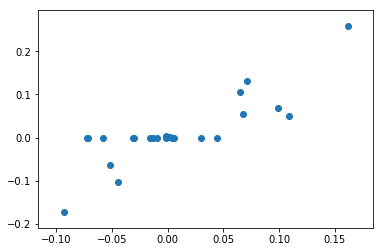

In [105]:
# Mean and Standard Deviation of the coefficients
Mean_ridge = np.ravel(np.mean(ridge_coeff,axis=0))
Mean_lasso = np.ravel(np.mean(lasso_coeff,axis=0))
print(Mean_ridge)
print(Mean_lasso)

plt.scatter(Mean_ridge,Mean_lasso,marker = 'o')
plt.show() 